In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
from scipy.stats import poisson
import seaborn as sns
import sklearn.neighbors
import matplotlib.pyplot as plt
%matplotlib inline

import Levenshtein

import sys
sys.path.append('..')

from lib import *

In [3]:
df = pd.read_csv('/home/amayer/lptcloud/data/msk_peptidome/mayer.csv')
df.head()

,Peptide,Modification,Protein.Name,Starting.Position,Length,Gene,Cell.Line
0,DEKNYTKAM,NaN,"1,2-dihydroxy-3-keto-5-methylthiopentene dioxy...",138,9,ADI1,MM1s
1,NYTKAMRLF,NaN,"1,2-dihydroxy-3-keto-5-methylthiopentene dioxy...",141,9,ADI1,MM1s
2,NYTKAMRLF,NaN,"1,2-dihydroxy-3-keto-5-methylthiopentene dioxy...",141,9,ADI1,OPM-2
3,RPDPGRPVGL,NaN,"1,2-dihydroxy-3-keto-5-methylthiopentene dioxy...",19,10,ADI1,U226
4,AFIPAIDSF,NaN,116 kDa U5 small nuclear ribonucleoprotein com...,873,9,EFTUD2,MM1s


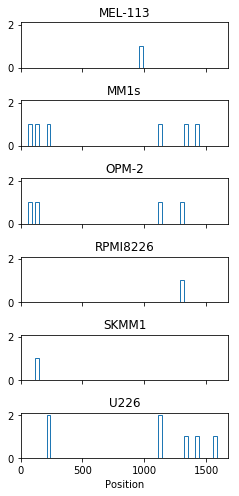

In [48]:
mask = df['Protein.Name']=='Eukaryotic translation initiation factor 4 gamma 1'
bins = np.arange(0, 1700, 30)
ncelllines = len(df[mask]['Cell.Line'].unique())
fig, axes = plt.subplots(figsize=(3.42, 7.0), nrows=ncelllines, sharex=True, sharey=True)
for i, (cellline, dfg) in enumerate(df[mask].groupby('Cell.Line')):
    axes[i].hist(dfg['Starting.Position'], bins=bins, histtype='step')
    axes[i].set_title(cellline)
    axes[i].set_xlim(min(bins), max(bins))
axes[-1].set_xlabel('Position')
fig.tight_layout()